In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %pip install seaborn
import seaborn as sns

# %pip install scipy
from scipy.stats import linregress

In [ ]:
# Read data from file

file_path = 'epa-sea-level.csv'


levels = pd.read_csv(file_path)
levels.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CSIRO Adjusted Sea Level'].plot(kind='hist', bins=20, title='CSIRO Adjusted Sea Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Lower Error Bound'].plot(kind='hist', bins=20, title='Lower Error Bound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Upper Error Bound'].plot(kind='hist', bins=20, title='Upper Error Bound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='CSIRO Adjusted Sea Level', y='Lower Error Bound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Lower Error Bound', y='Upper Error Bound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['CSIRO Adjusted Sea Level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('CSIRO Adjusted Sea Level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Lower Error Bound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Lower Error Bound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Upper Error Bound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Upper Error Bound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['CSIRO Adjusted Sea Level'].plot(kind='line', figsize=(8, 4), title='CSIRO Adjusted Sea Level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Lower Error Bound'].plot(kind='line', figsize=(8, 4), title='Lower Error Bound')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Upper Error Bound'].plot(kind='line', figsize=(8, 4), title='Upper Error Bound')
plt.gca().spines[['top', 'right']].set_visible(False)

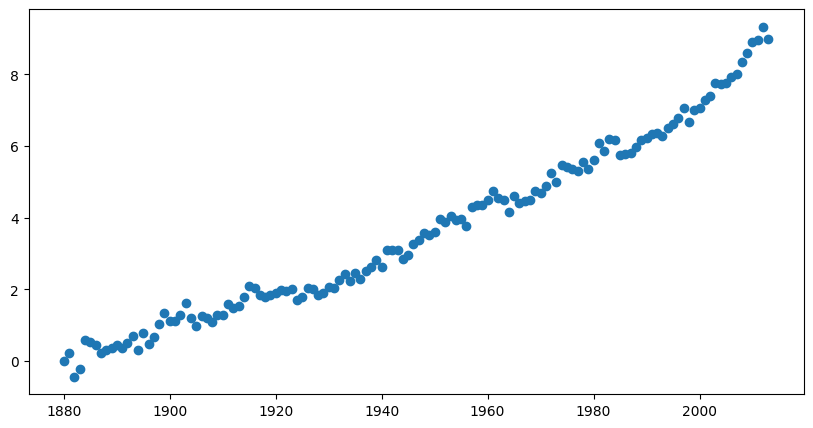

In [ ]:
# Create scatter plot

fig,ax = plt.subplots(figsize=(10,5))
x = levels['Year']
y = levels['CSIRO Adjusted Sea Level']
ax.scatter(x,y)


In [ ]:
# Create first line of best fit

reg1 = linregress(x,y)

x1 = np.arange(levels['Year'].min(), 2051, 1) ## extend x-vals (indp) : go from earliest recorded year to 2051 (through 2051)
y1 = list(reg1.slope*x1 + reg1.intercept)          ## reg line: y = mx + c

ax.plot(x1,y1, linestyle='--', c='black')

In [ ]:
## Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
## Make the line also go through the year 2050 to predict the sea level rise in 2050...
# if the rate of rise continues as it has since the year 2000.

In [ ]:
# Create second line of best fit

levels2 = levels [levels['Year']>=2000]     ## to use only data from 2000
reg2 = linregress(levels2['Year'], levels2['CSIRO Adjusted Sea Level'])

x2 = np.float64(np.arange(2000, 2051, 1))        ## take x (indp var.) from 2000 to 2051 ('go through 2050')
y2 = list(reg2.slope*x2 + reg2.intercept)
ax.plot(x2,y2, linestyle='--', c='r' )

In [ ]:
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

Text(0.5, 1.0, 'Rise in Sea Level')

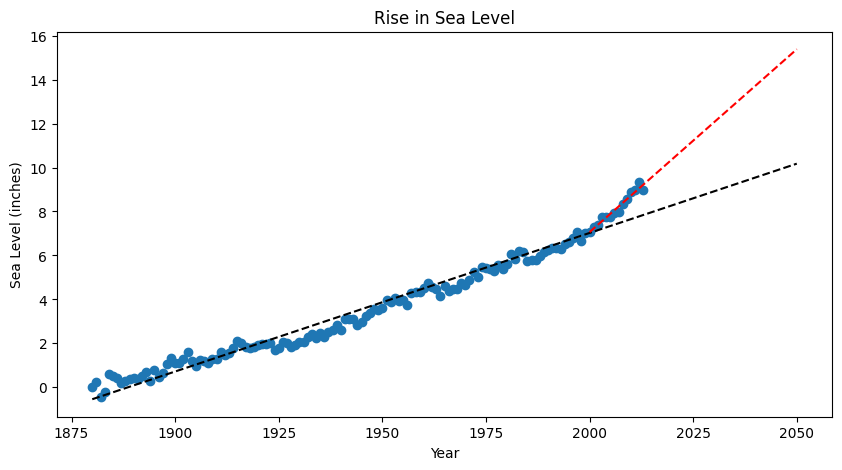

In [ ]:
fig

In [ ]:
fig.savefig('ScatterFig1')